About Dataset

Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies:Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1

# Búsqueda en cuadrícula

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/rafaR/Documents/DataS/proyectos/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

Importamos las librerias de sklearn


In [5]:
from sklearn.model_selection import GridSearchCV#permite crear la rejilla(grid) de busqueda con todas ls combinianciones posibles de los hiperparamtros
from sklearn.neighbors import KNeighborsClassifier#nuestro modelo
from sklearn.pipeline import Pipeline#nos ayuda al preprocesamiento, selección de características, entrenamiento y evaluación
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Dividimos el conjunto de datos en características (X) y etiquetas (y):

In [6]:
X = df.drop(columns=["Outcome"])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
#y = df[["Outcome"]]
#y.head()

In [8]:
y = df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify = y, random_state = 89)
X_test.head()
#inicializar una variable con minuscula cuando es un vector
#stratify = y deveulve la misma proporción ,deveuleve la misma cantidad de personas que tienen diabetes o no
#tanto para los datos de entrenamiento como de prueba

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
462,8,74,70,40,49,35.3,0.705,39
538,0,127,80,37,210,36.3,0.804,23
285,7,136,74,26,135,26.0,0.647,51
688,1,140,74,26,180,24.1,0.828,23
163,2,100,64,23,0,29.7,0.368,21


#1°
 Creamos un pipeline que escale los datos y aplique el algoritmo KNN

#2°
 Establecemos los hiperparámetros a buscar en la búsqueda en rejilla
 
#3°
 Creamos un objeto de búsqueda en rejilla utilizando el pipeline y los hiperparámetros:
 es decirle que busque el mejor prametro con un accuracy(scoring='accuracy' --> nos indica si esta bien o
 esta mal el modelo)
 y lo repita 5 veces(cv=5)
 

In [10]:
#1°
knn_pipe = Pipeline([('mms',MinMaxScaler()),#en este caso escalar los datos
                     ('knn',KNeighborsClassifier())])#indicar el algoritmo a utilizar KNN

#2°
params = [{'knn__n_neighbors': [3, 5, 7, 9],#creamos como un areglo para indicar que pruebe con estos parametros(toma 3 elementos a su alrededor 5 elementos a su alrededor etc.)
           'knn__weights': ['uniform', 'distance'],#de este parametro queremos que pruebe de la lista ['uniform', 'distance'(entre los elementos)] 
           'knn__leaf_size': [15, 20]}]#hace referencia a la geometria y/o la dimensionalidad

#3°
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

In [11]:
X_train.shape,y_train.shape

((576, 8), (576,))

In [12]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_knn.fit(X_train, y_train)
# Imprimimos los mejores hiperparámetros encontrados:
gs_knn.best_params_ #regresa los mejores parametros

{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

In [13]:
# Generamos el score de los hiperparámetros encontrados:
gs_knn.score(X_train, y_train)
#vemos que dió un score un poco bajo ,podemos pensar que no hay sobreajuste pero que tampoco es un buen modelo

0.7934027777777778

In [14]:
# Ahora mostramos el mejor estimador:
gs_knn.best_estimator_

Pipeline(steps=[('mms', MinMaxScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=9))])

Ahora tomamos ese modelo de cuadrícula y creamos algunas predicciones usando el conjunto de prueba, así como para crear informes de clasificación y matrices de confusión.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [16]:
# Generamos la matriz de confusión:
grid_predictions = gs_knn.predict(X_test)
matriz = confusion_matrix(y_test, grid_predictions)

print(matriz)#nos dice nuestras valores reales vs valores predichas

[[103  22]
 [ 31  36]]


<AxesSubplot:>

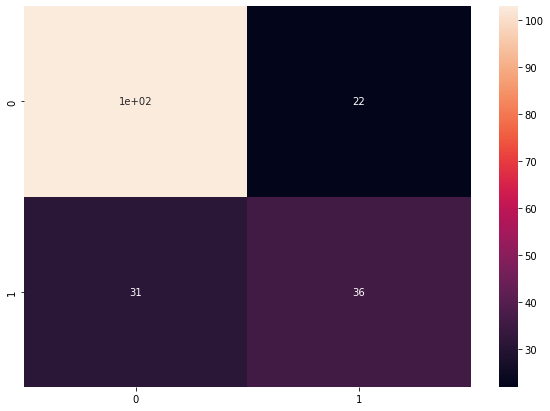

In [19]:
# Imprimimos la gráfica con la matriz de confusión:
#presentarlo graficamente
plt.figure(figsize = (10,7))
sn.heatmap(matriz, annot=True)
#podemos ver que el score de falsos negativos y falsos positivos son muy altos

In [24]:
# Reporte de clasificación:
print(classification_report(y_test, grid_predictions))
#en general se obtuvo un performance muy bajo para este modelo

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       125
           1       0.62      0.54      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.72      0.72      0.72       192



 Pros y contras

La búsqueda aleatoria es computacionalmente más barata.Sin embargo, no garantiza encontrar la mejor puntuación del espacio muestral.

# Búsqueda aleatoria
La selección de los valores de los hiperparámetros es completamente aleatoria,mientras la búsqueda de cuadrícula prueba todas las combinaciones de hiperparámetros

In [26]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

param_dist = {
    'C': stats.uniform(0.1,1e4), #Distribución uniforme entre 0.1 y 1e4
    'gamma': loguniform(1e-6,1e+1), # Distribución loguniform entre 1e-6 y 1e+1 
}

#C(es un alpha) indica penalizar las operaciones que realiza la regresión
#hará ua busqueda del punto 0.1 al punto 1e4,traé de manera aleatoria una seleccion de datos
#y selecciona de manera uniforme los datos para buscar  el parametro

A continuación, vamos a crear un objeto RandomizedSearchCV con argumento n_iter_searchy para ajustarlo a los datos de entrenamiento.

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Realizamos una búsqueda aleatoria de los parámetros óptimos para entrenar un modelo de SVM:
n_iter_search = 20

random_search = RandomizedSearchCV(
    SVC(),#mandamos a llamar el modelo SVM
    param_distributions= param_dist,## Distribución de parámetros a evaluar
    n_iter = n_iter_search,# Número de iteraciones de búsqueda
    refit = True,# Ajustar el modelo a los datos de entrenamiento una vez encontrados los mejores parámetros
    verbose = 3 #Nivel de detalle durante el proceso de ajuste del modelo
)

# Entrenamos el modelo a los datos de entrenamiento:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=7673.991834913542, gamma=5.5537039179554765e-06;, score=0.672 total time=   0.1s
[CV 2/5] END C=7673.991834913542, gamma=5.5537039179554765e-06;, score=0.757 total time=   0.0s
[CV 3/5] END C=7673.991834913542, gamma=5.5537039179554765e-06;, score=0.730 total time=   0.0s
[CV 4/5] END C=7673.991834913542, gamma=5.5537039179554765e-06;, score=0.835 total time=   0.0s
[CV 5/5] END C=7673.991834913542, gamma=5.5537039179554765e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=8867.49431390672, gamma=0.6830613768522065;, score=0.647 total time=   0.0s
[CV 2/5] END C=8867.49431390672, gamma=0.6830613768522065;, score=0.652 total time=   0.0s
[CV 3/5] END C=8867.49431390672, gamma=0.6830613768522065;, score=0.652 total time=   0.0s
[CV 4/5] END C=8867.49431390672, gamma=0.6830613768522065;, score=0.652 total time=   0.0s
[CV 5/5] END C=8867.49431390672, gamma=0.6830613768522065;, score=0.652 total time=   0.0s
[CV

RandomizedSearchCV(estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B5F1F2D30>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B604D0A90>},
                   verbose=3)

In [28]:
# Imprimimos los mejores parámetros encontrados por la búsqueda aleatoria:
print(random_search.best_params_)

{'C': 1290.5601197553278, 'gamma': 6.150859976859991e-06}


In [29]:
# Imprimimos el mejor estimador encontrado por la búsqueda aleatoria:
print(random_search.best_estimator_)

SVC(C=1290.5601197553278, gamma=6.150859976859991e-06)


Finalmente, tomamos ese modelo de búsqueda aleatoria y creamos algunas predicciones utilizando el conjunto de prueba y creamos informes de clasificación y matrices de confusión

In [32]:
# Ejecutamos una predicción usando el mejor estimador:
random_predictions = random_search.predict(X_test)

In [ ]:
matriz = confusion_matrix(y_test,random_predictions)
print(confusion_matrix(y_test, random_predictions))


[[111  14]
 [ 34  33]]


<AxesSubplot:>

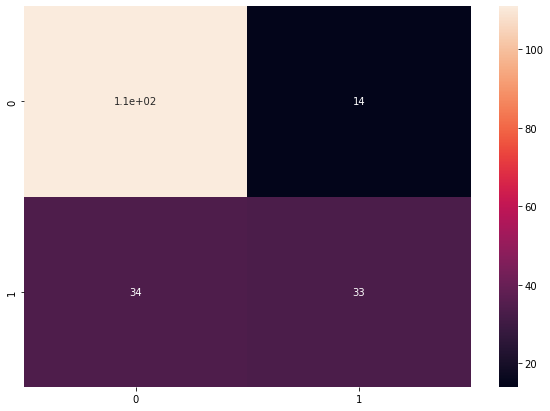

In [34]:
# Imprimimos la gráfica con la matriz de confusión:
plt.figure(figsize = (10,7))
sn.heatmap(matriz, annot=True)

podemos obsevar que hay una pequeña mejora en cuanto al resultado del modelo anterior,pero se sigue obteniendo un score alto en cuanto falsos negativos y falsos positivos

In [35]:
# Reporte de clasificación:
print(classification_report(y_test, random_predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       125
           1       0.70      0.49      0.58        67

    accuracy                           0.75       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



Pros y contras
La búsqueda aleatoria es computacionalmente más barata. Sin embargo, no garantiza encontrar la mejor puntuación del espacio muestral.

# Búsqueda informada

Utiliza las ventajas de la búsqueda tanto en cuadrícula como aleatoria. Sin embargo, tiene sus propias desventajas. A diferencia de la búsqueda en cuadrícula y aleatoria, la búsqueda informada aprende de sus iteraciones anteriores a través del siguiente proceso:

1.Búsqueda aleatoria.

2.Encuentra áreas con buena puntuación.

3.Ejecuta la búsqueda de cuadrícula en un área más pequeña.

4.Continúa hasta obtener la solución óptima.

In [36]:
!pip install tpot
#TPOT selecciona los mejores parametros y modelo. Es auto machine learning

  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=2bf1d7c316d2772d8bfa93e714af750b29de0ad5f55006308ce211b194831cb5
  Stored in directory: c:\users\rafar\appdata\local\pip\cache\wheels\48\8c\93\3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [38]:
# Importamos el clasificador TPOT de tpot:
from tpot import TPOTClassifier #funcion de clasificador ya que es de tipo clasificador nuestro problema de 2 categorías

tpot_clf = TPOTClassifier(
    generations = 20,#Número de generaciones para evolucionar los modelos
    population_size = 100,#Tamaño de la población de modelos en cada iteración
    verbosity = 2,#Nivel de detalle durante el proceso de entrenamiento
    offspring_size = 100,#
    scoring = 'accuracy',# Métrica para evaluar los modelos
    cv = 6 #Número de folds en la validación cruzada
)

# Entrenamos el clasificador TPOT
tpot_clf.fit(X_train, y_train)
# Evaluamos el clasificador TPOT con los datos de prueba
tpot_pred = tpot_clf.score(X_test, y_test)

#nos hace todo el trabajo para encontrar los algoritmos

Optimization Progress:   0%|          | 0/2100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7829861111111112

Generation 2 - Current best internal CV score: 0.7847222222222223

Generation 3 - Current best internal CV score: 0.7847222222222223

Generation 4 - Current best internal CV score: 0.7951388888888888

Generation 5 - Current best internal CV score: 0.7951388888888888

Generation 6 - Current best internal CV score: 0.7951388888888888

Generation 7 - Current best internal CV score: 0.7951388888888888

Generation 8 - Current best internal CV score: 0.7951388888888888

Generation 9 - Current best internal CV score: 0.7951388888888888

Generation 10 - Current best internal CV score: 0.7951388888888888

Generation 11 - Current best internal CV score: 0.7951388888888888

Generation 12 - Current best internal CV score: 0.796875

Generation 13 - Current best internal CV score: 0.796875

Generation 14 - Current best internal CV score: 0.796875

Generation 15 - Current best internal CV score: 0.796875

Generation 16 - Current best

In [47]:
#score es my bajo
tpot_pred

0.7239583333333334

Podemo sobservar que el mejor modelo es GradientBoostingClassifier con sus mejores parametros

In [64]:
#guardamos nuestro modelo en un .py para hacer algunas predicciones
tpot_clf.export('tpot_ml_pipeline.py')

In [65]:
import numpy as np
ex = np.array([2,90,70,35,56,30.3,0.825,29]).reshape(1,-1)

In [66]:
tpot_clf.predict(ex)

array([0], dtype=int64)

In [43]:
#import tpot
#METHODS AND ATTRIBUTES
#dir(tpot) 